In [1]:
from __future__ import print_function
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 目标
- 使用多种低通滤波器对图像进行模糊操作。
- 应用自定义滤波器对图像进行滤波（2D卷积）

# 1. 2D卷积（图像滤波）
与一维信号相同，图像也可以用多种低通滤波器（LPF）、高通滤波器（HPF）进行滤波。低通滤波器用于移除噪声、模糊图像等。高通滤波器用于寻找图像的边缘。

OpenCV提供了**cv2.filter2D()**函数对图像进行卷积运算，下面的例子将采用一个均值滤波器，一个5x5的均值滤波器如下式所示：
$$K = \frac {1} {25} \begin{bmatrix}
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1
\end{bmatrix}$$

卷积操作将做如下操作：将卷积核滑过每一个像素，在每一个像素位置卷积核覆盖的25个像素的邻域，然后用其均值来代替该像素的值。对图像中所有像素做这个运算。运行下面的代码来查看结果：

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

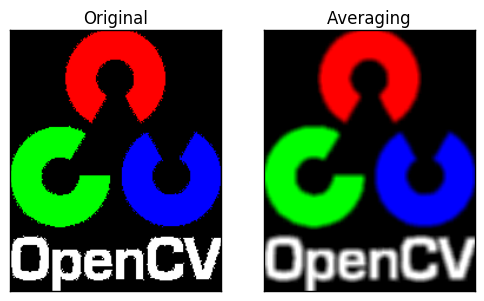

In [2]:
import cv2

img = cv2.imread('../data/opencv-logo-white.png')

kernel = np.ones((5, 5), np.float32) / 25
dst = cv2.filter2D(img, -1, kernel) # 第二个参数如果是负数，则目标图像与源图像的数据类型相同

plt.subplot(121), plt.imshow(img[:, :, ::-1]), plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(dst[:, :, ::-1]), plt.title('Averaging')
plt.xticks([]), plt.yticks([])

# 2. 图像模糊（图像平滑）
图像模糊是用低通滤波器对图像卷积得到的，能够有效地去除图像噪声。低通滤波本质上是在去除图像中的高频成分（噪声、边缘），因此边缘将会被模糊。（当然，存在模糊图像的同时保持边缘的模糊技术）。OpenCV提供四种模糊技术：

## 2.1 均值模糊
该模糊使用一个归一化的均值滤波器，可以把滤波器覆盖区域的像素求均值，然后替换中心像素。可以用**cv2.blur()**或**cv2.boxFilter()**来实现。查看文档可以获得更为详细的卷积核信息。调用该函数时，需要制定卷积核的宽度和高度，一个3x3的均值卷积核如下所示：
$$K = \frac 19 \begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}$$

> **注意**
> 如果想要使用归一化的均值滤波器，可以调用**cv2.boxFilter()**。需要设置参数**normalize=False**。

下面的代码使用了5x5的卷积核：

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

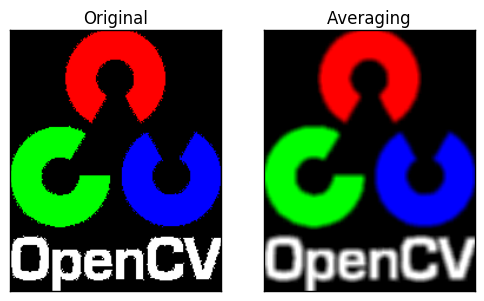

In [3]:
img = cv2.imread('../data/opencv-logo-white.png')

blur = cv2.blur(img, (5, 5))

plt.subplot(121), plt.imshow(img[:, :, ::-1]), plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(blur[:, :, ::-1]), plt.title('Averaging')
plt.xticks([]), plt.yticks([])

## 2.2 高斯模糊
下面的例子用高斯滤波代替了均值滤波，高斯滤波的函数为**cv2.GaussianBlur()**。调用时需要指定卷积核的宽度和高度，宽度和高度需要是正的奇数。还可以指定X方向和Y方向的标准差，分别传递给**sigmaX**和**sigmaY**参数。如果只有**sigmaX**参数被指定，**sigmaY**与**sigmaX**取相同的值。如果都设置为0，就根据卷积核的尺寸来计算标准差。高斯模糊对于去除高斯噪声非常高效。

如果需要，也可以用**cv2.getGaussianKernel()**函数来获得高斯卷积核（1D）。

上面的代码稍作修改：

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

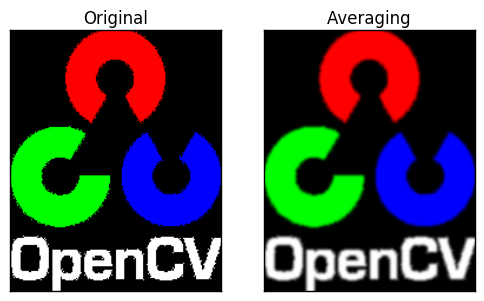

In [4]:
img = cv2.imread('../data/opencv-logo-white.png')

blur = cv2.GaussianBlur(img, (5, 5), 0)

plt.subplot(121), plt.imshow(img[:, :, ::-1]), plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(blur[:, :, ::-1]), plt.title('Averaging')
plt.xticks([]), plt.yticks([])

## 2.3 中值模糊
**cv2.medianBlur()**函数用卷积核覆盖区域的所有像素值的中间值作为卷积运算的结果。这对于去除椒盐噪声非常高效。在前面的滤波器中，中央元素的值是新计算出来的值，而在中值滤波中该值是已经存在的像素值。在中值模糊中，中央元素总是被图像中某个像素的值所替代，降低了噪声的影响。卷积核的尺寸必须是正的奇数。

下面的例子展示了中值滤波的效果：

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

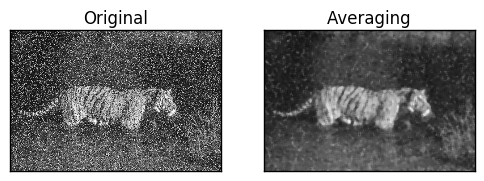

In [5]:
img = cv2.imread('../data/saltAndPepper.jpg')

blur = cv2.medianBlur(img, 7)

plt.subplot(121), plt.imshow(img[:, :, ::-1]), plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(blur[:, :, ::-1]), plt.title('Averaging')
plt.xticks([]), plt.yticks([])

## 2.4 双边滤波
双边滤波函数**cv2.bilateralFilter()**可以再去噪的同时保持边缘。但是该操作要比其他的滤波慢。之前，已经看到高斯滤波是把邻域内的像素按照高斯权重进行相加。高斯滤波只是空间的函数，只考虑临近的像素，而不考虑像素是否具有相似的强度。也不考虑像素是否位于边缘，因此会模糊边缘。

双边滤波包含两个高斯滤波器，一个用于邻域滤波，另一个用于计算像素的差异。空间高斯函数确保模糊时只考虑临近的像素，而强度差异高斯函数则确保只有中央像素与周围像素相似的情况下才进行模糊。因此双边滤波可以保留强度变化较大的边缘像素。

下面是使用双边滤波的例子：

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

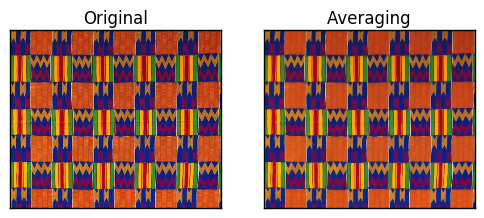

In [6]:
img = cv2.imread('../data/cloth.jpg')

blur = cv2.bilateralFilter(img, 9, 75, 75)

plt.subplot(121), plt.imshow(img[:, :, ::-1]), plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(blur[:, :, ::-1]), plt.title('Averaging')
plt.xticks([]), plt.yticks([])

从结果中可以看到纹理被模糊，而边缘被保留了。

# 3. 额外资源
1. [双边滤波器](http://people.csail.mit.edu/sparis/bf_course/)的细节。